# CNN (Convolutional Neural Network)

### For those who just want to sound smart

![SMART SPECIES](../public/images/smartt.jpg)

CNN is a neural network too, but it is designed specifically for grid-like data such as images. You *can* use a normal fully connected neural network for images, but doing so quickly becomes inefficient, slow, and impractical.

CNNs exist because images have structure, and ignoring that structure is a bad idea.

Before going deeper, let’s be clear about one thing: CNNs are not just for fun edge detection demos. They are used far beyond the few common examples people usually mention.

---

## Why did fully connected networks suck at images?

An image is not just a list of numbers. It is a large collection of numbers arranged in a very specific spatial structure.

For example, a color image of size 224 × 224 × 3 already contains more than 150,000 numbers. If we connect every pixel to every neuron in the next layer, the number of weights explodes immediately. As layers grow, computation becomes extremely expensive and the model overfits easily.

But the bigger problem is not even the number of parameters. It is that fully connected layers completely ignore *where* pixels come from.

A pixel on the top-left corner and a pixel on the bottom-right corner are treated as unrelated numbers. The model has no built-in notion of locality, edges, or shapes. Any spatial structure must be relearned again and again from scratch.

In short, fully connected networks treat images like spreadsheets. Images are not spreadsheets.

---

## Why CNN exists?

Convolutional Neural Networks were created to fix exactly these problems.

The idea of CNNs was pioneered by Yann LeCun in the late 1980s at AT&T Bell Labs while working on handwritten digit recognition for automatic check processing. This was a very practical real-world problem at the time.

The design of CNNs was inspired by two main sources:

* Neuroscience, particularly the work of Hubel and Wiesel, which showed that the human visual cortex processes visual information hierarchically, starting from simple patterns like edges and gradually building up to complex shapes.
* Kunihiko Fukushima's Neocognitron (1980), which introduced the idea of hierarchical feature extraction using localized receptive fields.

CNNs were not created to be mathematically fancy. They were created to respect how visual information is structured.

---

## What CNNs are actually used for

CNNs are widely known for image classification, but their use goes far beyond answering “what is in this image?”.

They are used for:

* **Image classification**: deciding what the image contains
* **Object detection**: finding *what* objects are present and *where* they are
* **Image segmentation**: assigning a label to every pixel
* **Face recognition** and biometric systems
* **Medical imaging**: tumor detection, organ segmentation, radiology analysis
* **Autonomous driving**: lane detection, obstacle recognition
* **Satellite imagery**: land use analysis, disaster monitoring
* **Video understanding**: action recognition and tracking

CNNs are also used outside images, wherever data has a grid-like or spatial structure.

---

## The core idea behind CNNs

CNNs are built on one simple but powerful assumption: if a feature is useful to detect at one location in an image, it should also be useful at other locations.

An edge is still an edge whether it appears on the left, right, top, or bottom of the image. A corner is still a corner anywhere.

Instead of learning separate weights for every pixel location, CNNs reuse the same small set of weights across the entire image. This idea is called **weight sharing**, and it is the heart of convolution.

---

## What convolution really means (without math)

A convolution layer uses small pattern detectors called **filters**.

These filters are *not* hand-designed and they do *not* come from heaven. During training, filters start as random numbers.

Yes, random. No edges. No curves. Just noise.

Each filter looks at a small patch of the image at a time. It slides across the image and asks one question at every location:

“How much does this pattern exist here?”

The result of this sliding operation is called a **feature map**. Each feature map highlights where a specific pattern appears in the image.

One filter produces one feature map. Multiple filters allow the network to detect multiple patterns in parallel.

After training, some filters behave like edge detectors, some like curve detectors, some like texture detectors, and some respond to more complex visual cues. This behavior is learned, not programmed.

---

## Why local receptive fields matter

CNN filters do not look at the whole image at once. They focus on small local regions.

This matters because visual patterns are local. Edges, corners, and textures are formed by nearby pixels, not by distant ones.

By stacking convolution layers, CNNs gradually build more complex patterns from simpler ones. Early layers respond to basic edges and color changes, middle layers respond to shapes and motifs, and deeper layers respond to object parts and semantic concepts.

This hierarchy emerges naturally during training because it helps reduce prediction error.

---

## Pooling: shrinking space, keeping meaning

After convolution, CNNs often apply pooling, but pooling is not mandatory and is not always used in modern architectures.

When pooling is used, it typically takes small regions, commonly 2 × 2, from each feature map and reduces them to a single number.

This reduction can be done by:

* **Max pooling**: keeping the largest value
* **Average pooling**: taking the average

Pooling creates smaller feature maps while keeping the most important information. It reduces spatial size, computation, and sensitivity to small shifts in the image.

In some modern architectures, pooling is replaced by strided convolutions or removed entirely to preserve spatial detail.

---

## From seeing to deciding: Flatten and Fully Connected layers

After several rounds of convolution (and sometimes pooling), the network ends up with many feature maps stacked together.

Each feature map contains spatial information about where a learned pattern appears. Together, they form a 3D volume of learned visual features.

Flattening takes this entire volume and reshapes it into a single one-dimensional vector. This vector contains all detected features from all locations.

Nothing is lost. The information is simply reorganized.

This vector is then passed to fully connected layers. Each fully connected neuron learns how combinations of these features relate to specific classes.

The final fully connected layer outputs raw scores, called **logits**, one for each class.

A softmax function converts these logits into probabilities. These probabilities are compared with the true labels using a loss function during training.

The loss is then used to update all weights in the network, including the convolutional filters.

---

## Training vs usage (important distinction)

During training:

* Filters start as random numbers
* Predictions are often wrong
* Loss measures how wrong they are
* Gradients update the weights

After training:

* Filters behave like edge, shape, or texture detectors
* Feature maps become meaningful
* Predictions become reliable

The network does not change behavior magically. It changes because it was optimized for a specific task.

---

## Why CNNs finally worked in practice

CNNs existed long before they became popular.

What changed was not the core idea, but the environment:

* ReLU activations improved gradient flow
* GPUs made large-scale training feasible
* Massive labeled datasets became available

AlexNet in 2012 showed that CNNs could scale and outperform traditional vision methods.

CNNs did not win because of new math. They won because the world finally caught up.

---

## Closing thought

CNNs work because they respect structure.

They do not treat images as random numbers. They treat them as spatial signals.

That simple idea is what changed computer vision forever.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [4]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9035 - loss: 0.3057 - val_accuracy: 0.9840 - val_loss: 0.0550
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9862 - loss: 0.0441 - val_accuracy: 0.9892 - val_loss: 0.0363
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9902 - loss: 0.0302 - val_accuracy: 0.9907 - val_loss: 0.0330


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9872 - loss: 0.0384
Test accuracy: 0.9902999997138977


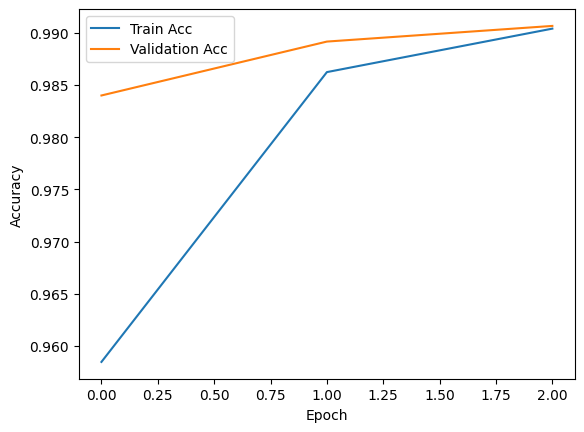

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Data Augmentation

creating new training examples by transforming existing ones.

for images, common transforms are:

* small rotations
* shifts left or right
* zoom in or out
* slight distortions

it teaches invariance

In [10]:
# creating augmentation generator 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10, #means to rotate between -10 and +10 degrees
    width_shift_range=0.1, # shift up to 10 percent horizontally
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train)

In [11]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9947 - loss: 0.0151 - val_accuracy: 0.9902 - val_loss: 0.0358
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9965 - loss: 0.0105 - val_accuracy: 0.9900 - val_loss: 0.0419
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9973 - loss: 0.0095 - val_accuracy: 0.9908 - val_loss: 0.0357
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9981 - loss: 0.0064 - val_accuracy: 0.9890 - val_loss: 0.0463
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9973 - loss: 0.0081 - val_accuracy: 0.9908 - val_loss: 0.0372


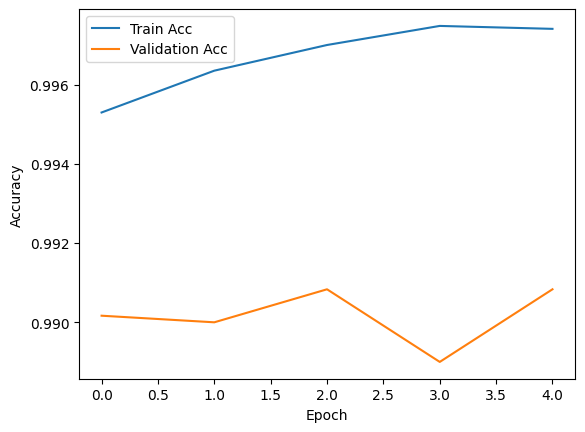

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=5,
    validation_data=(x_test,y_test)
)

Epoch 1/5
   5/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.8757 - loss: 0.3846 

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9597 - loss: 0.1340 - val_accuracy: 0.9905 - val_loss: 0.0283
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9838 - loss: 0.0538 - val_accuracy: 0.9914 - val_loss: 0.0263
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9859 - loss: 0.0460 - val_accuracy: 0.9929 - val_loss: 0.0202
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9873 - loss: 0.0404 - val_accuracy: 0.9926 - val_loss: 0.0237
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9886 - loss: 0.0354 - val_accuracy: 0.9923 - val_loss: 0.0234


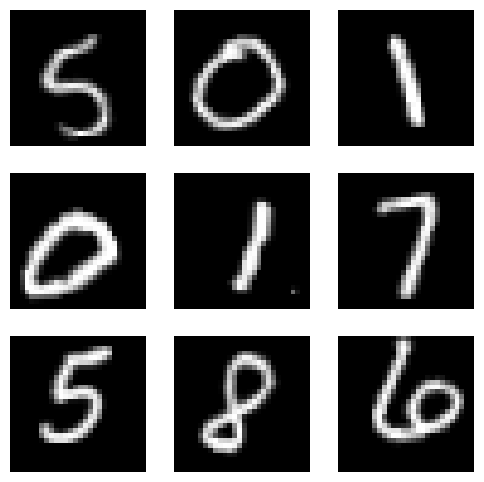

In [14]:
import matplotlib.pyplot as plt

batch = next(datagen.flow(x_train, y_train, batch_size=9))

images = batch[0]

plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].reshape(28,28), cmap='gray')
    plt.axis('off')

plt.show()

In [15]:
len(batch)

2

## CIFAR-10

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 62s 0us/step


In [3]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

C:\Users\krish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
history2 = model.fit(
    x_train, y_train,
    epochs=2,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.7177 - loss: 0.8253 - val_accuracy: 0.7332 - val_loss: 0.7550
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.7367 - loss: 0.7818 - val_accuracy: 0.7272 - val_loss: 0.7962


In [27]:
history = model.fit(
    x_train, y_train,
    epochs = 50,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8465 - loss: 0.4473 - val_accuracy: 0.7978 - val_loss: 0.6321
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8508 - loss: 0.4384 - val_accuracy: 0.8152 - val_loss: 0.5420
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8524 - loss: 0.4242 - val_accuracy: 0.8356 - val_loss: 0.5134
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8573 - loss: 0.4266 - val_accuracy: 0.8339 - val_loss: 0.5336
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8563 - loss: 0.4214 - val_accuracy: 0.8327 - val_loss: 0.5250
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8581 - loss: 0.4093 - val_accuracy: 0.8181 - val_loss: 0.5552
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8606 - loss: 0.4035 - val_accuracy: 0.8350 - val_loss: 0.5159
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8572 - loss: 0.4154 - val_accuracy: 0.

In [30]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
history3 = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.9121 - loss: 0.2594 - val_accuracy: 0.8553 - val_loss: 0.4937
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9063 - loss: 0.2673 - val_accuracy: 0.8538 - val_loss: 0.5146
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9065 - loss: 0.2762 - val_accuracy: 0.8549 - val_loss: 0.4961
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9053 - loss: 0.2733 - val_accuracy: 0.8475 - val_loss: 0.5022
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9062 - loss: 0.2673 - val_accuracy: 0.8521 - val_loss: 0.4831
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9065 - loss: 0.2636 - val_accuracy: 0.8555 - val_loss: 0.4924
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9061 - loss: 0.2724 - val_accuracy: 0.8576 - val_loss: 0.5050
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9057 - loss: 0.2693 - val_accuracy: 

In [32]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.01, momentum=0.9),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [33]:
history4 = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8831 - loss: 0.3466 - val_accuracy: 0.7972 - val_loss: 0.7229
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8811 - loss: 0.3537 - val_accuracy: 0.8281 - val_loss: 0.6014
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8827 - loss: 0.3450 - val_accuracy: 0.8392 - val_loss: 0.5461
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8843 - loss: 0.3416 - val_accuracy: 0.8445 - val_loss: 0.5549
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8867 - loss: 0.3301 - val_accuracy: 0.7997 - val_loss: 0.6861
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8895 - loss: 0.3300 - val_accuracy: 0.8220 - val_loss: 0.6182
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8933 - loss: 0.3165 - val_accuracy: 0.8105 - val_loss: 0.6653
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8889 - loss: 0.3255 - val_accuracy:

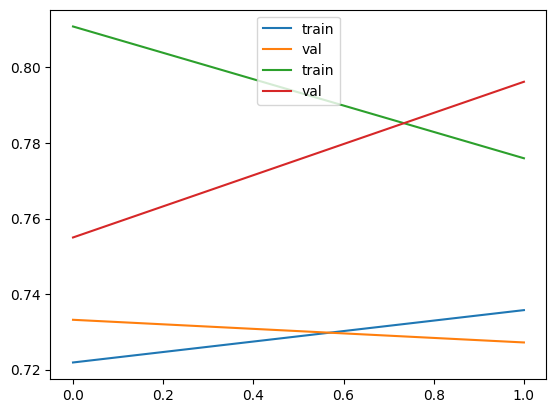

In [7]:
history = history2
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.legend()
plt.show()

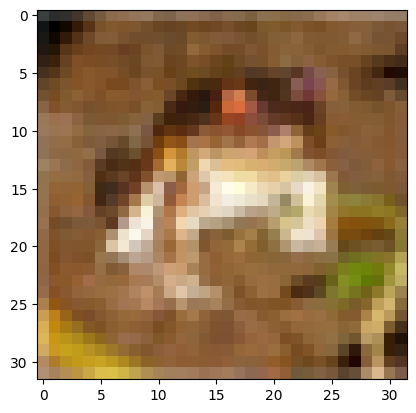

In [30]:
plt.imshow(x_train[0])

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
     rotation_range=10, #means to rotate between -10 and +10 degrees
    width_shift_range=0.1, # shift up to 10 percent horizontally
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train)

In [33]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs = 10,
    validation_data = (x_test, y_test)
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.7378 - loss: 0.7575 - val_accuracy: 0.7586 - val_loss: 0.7726
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.7815 - loss: 0.6266 - val_accuracy: 0.7744 - val_loss: 0.7167
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.7961 - loss: 0.5803 - val_accuracy: 0.7784 - val_loss: 0.7053
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8055 - loss: 0.5574 - val_accuracy: 0.7752 - val_loss: 0.6996
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8140 - loss: 0.5327 - val_accuracy: 0.7915 - val_loss: 0.6344
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8207 - loss: 0.5129 - val_accuracy: 0.7917 - val_loss: 0.6663
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8280 - loss: 0.4976 - val_accuracy: 0.7980 - val_loss: 0.6589
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.8331 - loss: 0.47

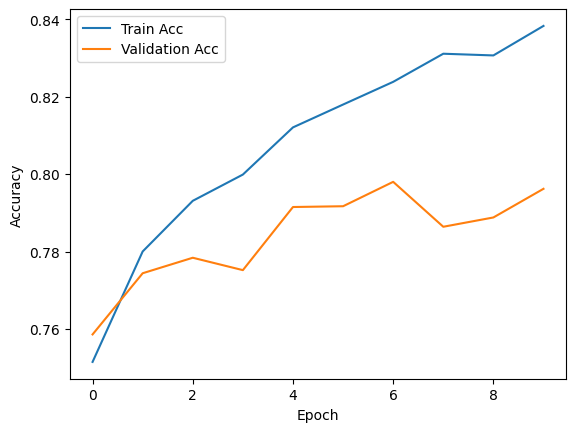

In [34]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Validation Acc')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [9]:
y_pred_classes

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [10]:
y_pred

array([[4.45504533e-03, 1.42921535e-02, 9.66697093e-03, ...,
        8.59583821e-03, 1.17642611e-01, 2.66998671e-02],
       [4.39705735e-04, 1.75982888e-04, 1.19677590e-09, ...,
        1.22387495e-12, 9.99374211e-01, 1.00702555e-05],
       [4.75892983e-03, 4.99238085e-04, 6.81192205e-06, ...,
        4.46782806e-08, 9.94465053e-01, 2.64343980e-04],
       ...,
       [2.22488634e-05, 2.03880248e-07, 8.78520831e-02, ...,
        1.78691730e-01, 5.58585725e-07, 5.39788016e-06],
       [1.99420322e-02, 9.32776451e-01, 7.24293524e-04, ...,
        5.97908365e-05, 6.23611128e-03, 3.93526927e-02],
       [9.06963677e-08, 5.68204511e-12, 6.85621286e-04, ...,
        8.71064425e-01, 3.09208992e-10, 2.59256865e-08]], dtype=float32)

In [11]:
y_pred[0]

array([0.00445505, 0.01429215, 0.00966697, 0.6815359 , 0.00248201,
       0.10210593, 0.03252372, 0.00859584, 0.11764261, 0.02669987],
      dtype=float32)

In [12]:
wrong_idx = np.where(y_pred_classes != y_test.flatten())[0]
wrong_idx

array([   7,   10,   12, ..., 9989, 9993, 9995], dtype=int64)

In [14]:
wrong_idx[0]

7

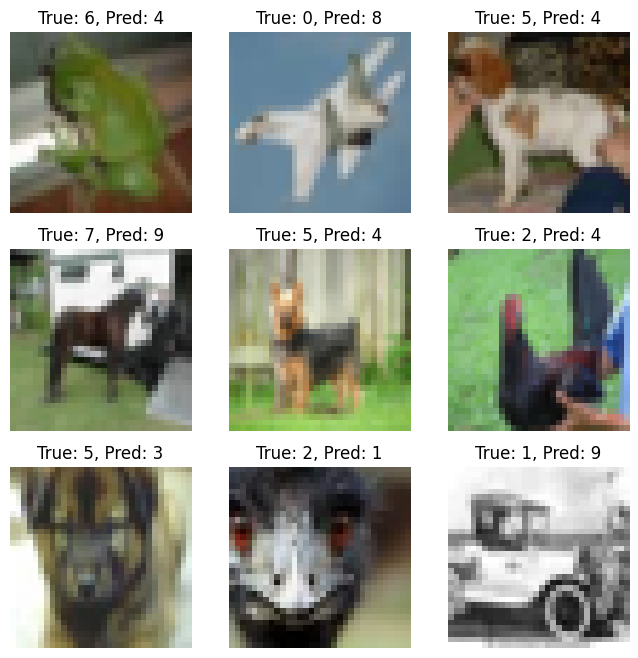

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for i in range(9):
    idx = wrong_idx[i]
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {y_test[idx][0]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.show()


Defaulting to user installation because normal site-packages is not writeable


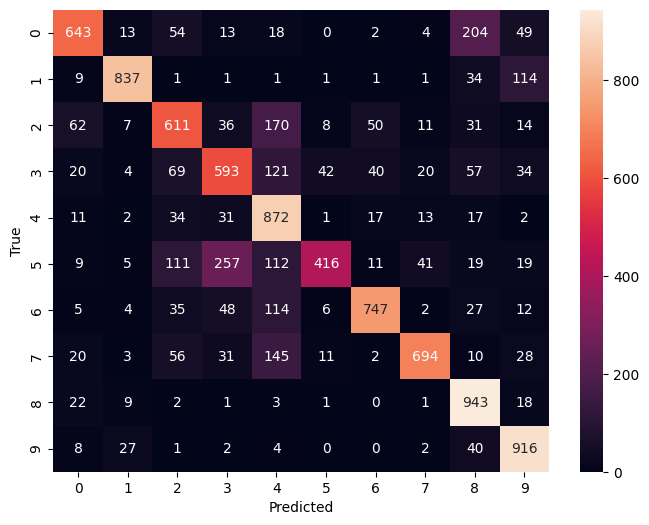

In [17]:
!pip install seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [18]:
confidences = np.max(y_pred, axis=1)
confidences

array([0.6815359 , 0.9993742 , 0.99446505, ..., 0.69176215, 0.93277645,
       0.8710644 ], dtype=float32)

In [19]:
low_confidences = confidences[confidences < 0.5]
low_confidences

array([0.47235626, 0.31308082, 0.44529584, ..., 0.37078   , 0.3857179 ,
       0.24716209], dtype=float32)

In [20]:
y_pred[0]

array([0.00445505, 0.01429215, 0.00966697, 0.6815359 , 0.00248201,
       0.10210593, 0.03252372, 0.00859584, 0.11764261, 0.02669987],
      dtype=float32)